### Project 1: (10 points)
#####  your total (60 points) will divided by 6 to get 10 points for this project.

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide. 
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted. 

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [16]:
# write you code here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor, RANSACRegressor

from sklearn.model_selection import GridSearchCV
import warnings

with warnings.catch_warnings():
  # ignore all caught warnings
	warnings.filterwarnings("ignore")




    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data. 

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [3]:
# write you code here
insta_df = pd.read_csv('Instagram_Data.csv', nrows=2000)

##
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [6]:
# 10 first rows of the data
print(insta_df.head(10))

   User uuid  Likes  Days passed from post  Likes Score    Type   
0          1    506                    657         0.74   Image  \
1          1    385                    657         0.57   Image   
2          1    373                    666         0.55  Images   
3          1    312                    667         0.46  Images   
4          1    513                    674         0.75  Images   
5          1    539                    677         0.79  Images   
6          1    330                    677         0.49   Image   
7          1    472                    681         0.69  Images   
8          1    272                    682         0.40   Image   
9          1    304                    688         0.45  Images   

   Numer of Tags  Numer of Comments          Date Posted  Year  Month  Day   
0              3                 11  2019-05-12 21:18:39  2019      5   12  \
1              0                  1  2019-05-12 14:25:55  2019      5   12   
2              4            

In [24]:
# insta_df shape
print(insta_df.shape)

(2000, 12)


In [7]:
# insta_df column names
print(insta_df.columns)

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')


    4- Check the number of samples in the dataset (1 point)

In [9]:
# insta_df row numbers: 
print(insta_df.shape[0])

2000


    5- Check the data type of each column ( 1 point)

In [14]:
# Print datatypes
print(insta_df.dtypes)

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object


    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points) 

In [4]:
# Remove User uuid
del insta_df['User uuid']

# Remove User Likes Score
del insta_df['Likes Score']

# Remove the date and time columns
rem = ['date posted','year', 'month', 'day', 'hour', 'minute']
insta_df.drop(columns=[col for col in insta_df.columns if col.lower() in rem], inplace=True)

# show the insta_df after you remove the required columns
print(insta_df.head())

   Likes  Days passed from post    Type  Numer of Tags  Numer of Comments
0    506                    657   Image              3                 11
1    385                    657   Image              0                  1
2    373                    666  Images              4                 15
3    312                    667  Images              4                  1
4    513                    674  Images              5                  0


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [5]:
# write you code here
print(insta_df['Type'].unique())

['Image' 'Images' 'Video']


    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [6]:
# Encode "Type"
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
insta_df['Type'] = encoder.fit_transform(insta_df['Type'])

##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column: 

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [14]:
# a. How many NaNs as total
insta_df.isnull().sum()

Likes                    0
Days passed from post    0
Type                     0
Numer of Tags            0
Numer of Comments        0
dtype: int64

In [15]:
# b. How many NaNs as a percentage of overall data
insta_df.isnull().sum() / len(insta_df) * 100

Likes                    0.0
Days passed from post    0.0
Type                     0.0
Numer of Tags            0.0
Numer of Comments        0.0
dtype: float64

    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [9]:
# your featuers X:
X = insta_df.loc[:, insta_df.columns != 'Likes']
##
X

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0
...,...,...,...,...
1995,186,0,0,84
1996,193,2,4,5
1997,194,0,4,13
1998,197,1,0,38


In [10]:
# your target y:
y = insta_df.loc[:,'Likes']

##
y

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64

    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

In [18]:
# write your code here:
print(X.corr())

                       Days passed from post      Type  Numer of Tags   
Days passed from post               1.000000 -0.146155      -0.170063  \
Type                               -0.146155  1.000000      -0.013724   
Numer of Tags                      -0.170063 -0.013724       1.000000   
Numer of Comments                  -0.115434  0.002244       0.053189   

                       Numer of Comments  
Days passed from post          -0.115434  
Type                            0.002244  
Numer of Tags                   0.053189  
Numer of Comments               1.000000  


    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

--
From the above matrix, we can see that "Days passed from post" has a negative correlation with other features implying the more days pass between each post the less the number of tags/comments the post gets

--

    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

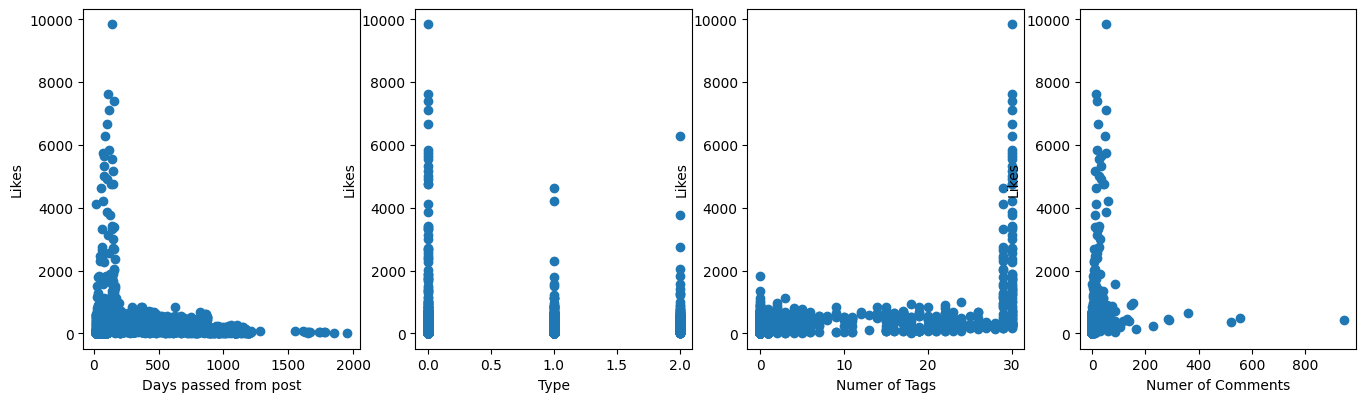

In [19]:
# write your code here
plt.figure(figsize = ( 25 , 15 )) 
features = list (X) 
for i, col in enumerate (features): 
    plt.subplot(3 , 6 ,i +1 ) 
    x = insta_df[col] 
    y = y 
    plt.scatter(x, y, marker = 'o' )
    plt.xlabel(col) 
    plt.ylabel( 'Likes' )

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

--
1) You get more likes if you post frequently.
2) Image>Images>Videos tend to generate more likes in that order.
3) 30 is the magic number of tags to get the most amount of likes.
4) Number of comments is directly proportional to likes.

--

    15- Display the target distribution using histogram (1 points)

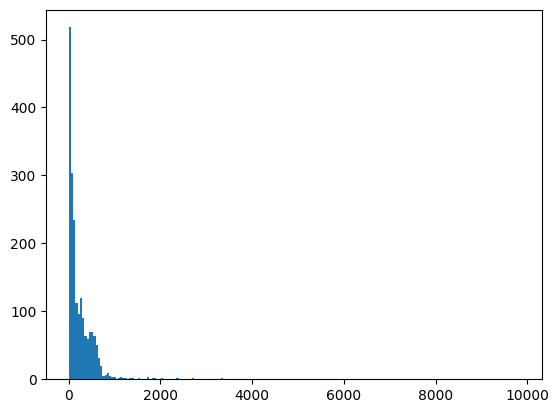

In [20]:
# write your code here:
plt.hist(y, bins='auto')
plt.show()

    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

-- This plot shows the amount of likes for each post, showing that only 1 post has 500 likes. Only 3 posts have more than 200 likes and so on.


--

    17-Transfer the target y into log to have the normal distributions: (1 point)

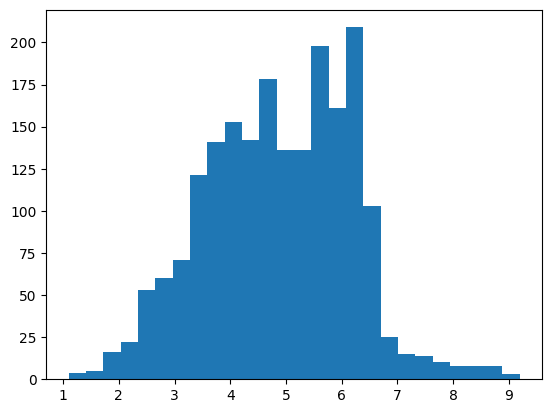

In [21]:
import numpy as np
transformed_y = np.log(y)
plt.hist(transformed_y, bins='auto')
plt.show()

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [11]:
# Splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# print the sizes of our training and test set:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 4)
(400, 4)
(1600,)
(400,)


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [33]:
# writer your code here:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores_pipe_1 = cross_val_score(pipeline, X_train, y_train,cv=10)
print("Average 10-Fold CV R2 Score: {}".format((np.mean(scores_pipe_1)) ))
scores_pipe_2 = cross_val_score(pipeline, X_train, y_train,cv=10, scoring='neg_mean_squared_error') # this return the negated value of the MSE, make sure to multiply it by -1 to get the positive one
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(scores_pipe_2)) ))

Average 10-Fold CV R2 Score: 0.2537024335283243
Average 10-Fold CV MSE Score: 374088.1102253831


    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [30]:
# write your code here:
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    ridge = Ridge()
    grid_search = GridSearchCV(estimator=ridge, param_grid = {'alpha': [-3, -2, 1, 2, 3]}, cv=10, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_alpha = grid_search.best_params_['alpha']
    best_score = grid_search.best_score_

    print("Best alpha:", best_alpha)
    print("Best score:", -best_score)

Best alpha: 3
Best score: 374085.7715973538


        B. Lasso: 
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [32]:
# write your code here:
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    lasso = Lasso()
    grid_search = GridSearchCV(lasso, param_grid={'alpha':[-3, -2, 1, 2, 3]}, cv=10, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_alpha = grid_search.best_params_['alpha']
    best_score = grid_search.best_score_

    print("Best alpha:", best_alpha)
    print("Best score:", -best_score)

Best alpha: 2
Best score: 374076.56790576177


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [42]:
# write your code here:
pipeline = make_pipeline(HuberRegressor(max_iter=X.shape[0]))
mse_scores = -cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
avg_mse = mse_scores.mean()
print("Absolute Average MSE:", avg_mse)

Absolute Average MSE: 430540.55640044855


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [26]:
# write your code here:
pipeline = make_pipeline(RANSACRegressor())
mse_scores = -cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
avg_mse = mse_scores.mean()
print("Absolute Average MSE:", avg_mse)

Absolute Average MSE: 515520.50818867097


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

-- From the cross-validation scores on average, Lasso regression had the best score



--

    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [34]:
# write your code here:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lasso = Lasso(alpha=2)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=2)

    24- Predict the number of likes for test data and compute the MSE (5 points)

In [41]:
# write your code here:
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 181696.15355025427


    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include: 
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation. 

--
1) Lasso regression performs very will for this model, because of multicollinearity being present in the dataset, and the small number of present variables after every variable related to data/time was removed from the dataset

2) Looking at the MSE scores for linear regression versus Robust regressions, the linear regression performed better for this model. It could be because minimal number of outliers or normal distribution of the dataset

3) linear regression provides a method to model relationships between variables, The goal is to find the best-fitting line or hyperplane that minimizes the difference between the observed data points and the predicted values.

    while cross-validation is a technique to assess and validate the performance of a predictive model. Together, they contribute to building reliable and accurate regression models for a wide range of applications.

--

---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue. 

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 . 
---